In [47]:
from pycpd import AffineRegistration, DeformableRegistration, RigidRegistration
from IPython.display import display
import numpy as np
import pandas as pd
import pycpd
import seaborn as sns

In [18]:
# ref: https://stackoverflow.com/questions/35418012/how-to-create-matrix-of-points-by-x-y-coordinate-in-python
# Use a dataframe to save the generated data.
def generate_toy_data(nx=10, ny=5, sigma=.05, tx=2.3, ty=0.8):
    '''
    Generate toy data to test out the pycpd package.
    Arguments:
    nx: number of grid points in x
    ny: number of grid points in y
    sigma: the degree of wiggling of each moved point
    tx: x coordinate of the translation vector
    ty: y coordinate of the translation vector
    '''
    # define the lower and upper limits for x and y
    minX, maxX, minY, maxY = 0, nx-1, 0, ny-1
    # create one-dimensional arrays for x and y
    x = np.linspace(minX, maxX, maxX-minX+1)
    y = np.linspace(minY, maxY, maxY-minY+1)
    # create the mesh based on these arrays
    X, Y = np.meshgrid(x, y)
    X = X.reshape((np.prod(X.shape),))
    Y = Y.reshape((np.prod(Y.shape),))

    # save the generated data to a dataframe
    df = pd.DataFrame()
    df['x0'] = X
    df['y0'] = Y

    # sample nx*ny random vectors from a 2D Gaussian
    cov_mat = np.identity(2) * sigma**2
    np.random.seed(42)
    dR = np.random.multivariate_normal([0, 0], cov_mat, size=len(X))
    
    # store the random vectors
    df['dx'] = dR[:,0]
    df['dy'] = dR[:,1]

    # calculate the wiggled points
    df['xw'] = df.x0 + df.dx
    df['yw'] = df.y0 + df.dy

    # store the translation vector
    df['tx'] = tx
    df['ty'] = ty

    # the final points
    df['x1'] = df.xw + df.tx
    df['y1'] = df.yw + df.ty

    return df

In [21]:
df_toy_data = generate_toy_data()
df_sampled_data = df_toy_data.sample(n=int(len(df_toy_data)*0.8), random_state=42)

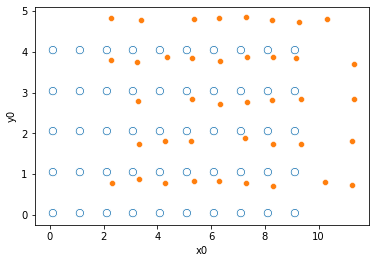

In [22]:
sns.scatterplot(data=df_toy_data, x='x0', y='y0', marker='$\circ$', s=200)
sns.scatterplot(data=df_sampled_data, x='x1', y='y1');

0.9728535702423123 [-2.21550082 -0.61821579]
[[ 0.9999374  -0.01118892]
 [ 0.01118892  0.9999374 ]]


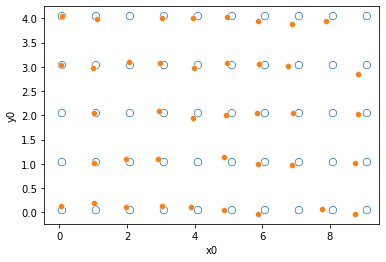

In [45]:
# rigid registration
X = df_toy_data[['x0', 'y0']].to_numpy()
Y = df_sampled_data[['x1', 'y1']].to_numpy()
reg = RigidRegistration(**{'X': X, 'Y': Y})
TY_R, (s_reg, R_reg, t_reg) = reg.register()
sns.scatterplot(data=df_toy_data, x='x0', y='y0', marker='$\circ$', s=200)
sns.scatterplot(x=TY_R[:,0], y=TY_R[:,1]);
print(s_reg, t_reg)
print(R_reg)

[-2.3771798 -0.6195101]


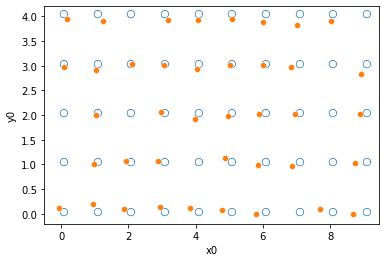

In [42]:
# affine registration
reg = AffineRegistration(**{'X': X, 'Y': Y})
TY_A, (B_reg, t_reg) = reg.register()
sns.scatterplot(data=df_toy_data, x='x0', y='y0', marker='$\circ$', s=200)
sns.scatterplot(x=TY_A[:,0], y=TY_A[:,1]);
print(t_reg)

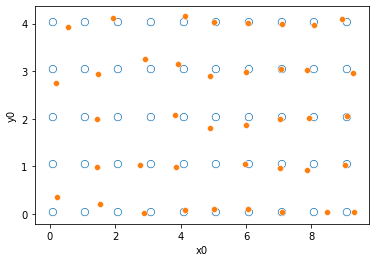

In [43]:
# deformable registration
reg = DeformableRegistration(**{'X': X, 'Y': Y})
TY_D, _ = reg.register()
sns.scatterplot(data=df_toy_data, x='x0', y='y0', marker='$\circ$', s=200)
sns.scatterplot(x=TY_D[:,0], y=TY_D[:,1]);